# AUTO INSURANCE : H-CLUSTERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('AutoInsurance.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Lets perform some EDA on the data

In [3]:
data = df.copy()

In [4]:
data.shape

(9134, 24)

In [5]:
data.isnull().sum()  # No Missing value in the data

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [6]:
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [7]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
data.duplicated().sum() # No Duplicates in the data

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Lets analyse using some visualizations

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Income'>

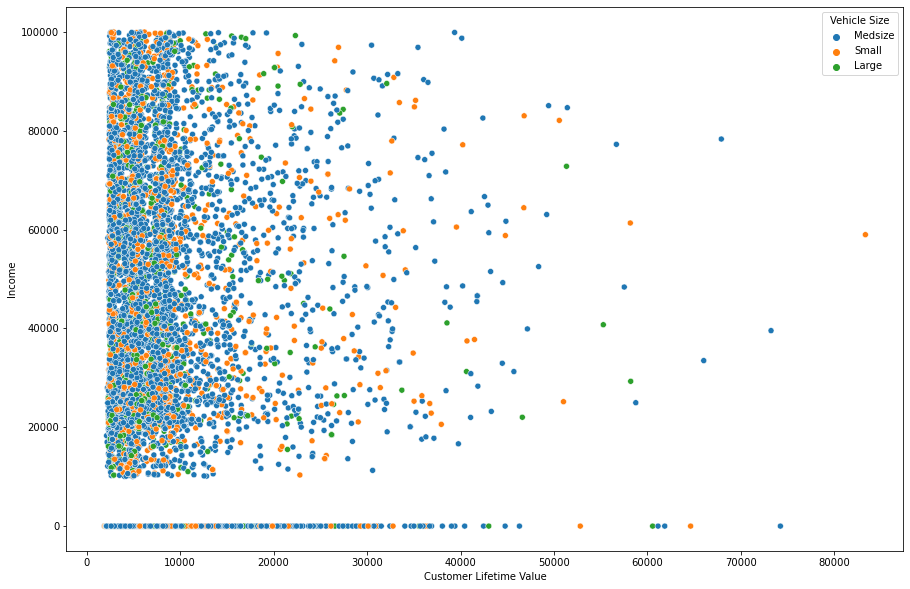

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Customer Lifetime Value', y = 'Income', data = data, hue='Vehicle Size')

<AxesSubplot:>

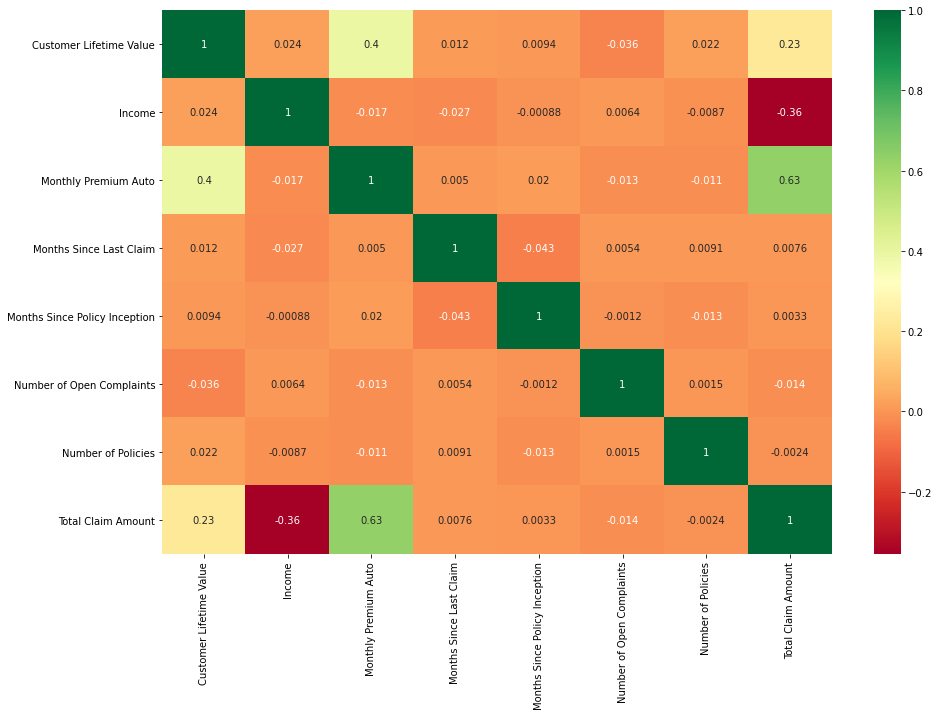

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), cmap='RdYlGn', annot=True)

Apart from Monthly Premium Auto to Total Claim amount, no other columns have strong correlation

Lets see the spread of our data

In [12]:
data1 = data.select_dtypes(include=['int64', 'float64']) # We are selecting only those columns which are float or int
data1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


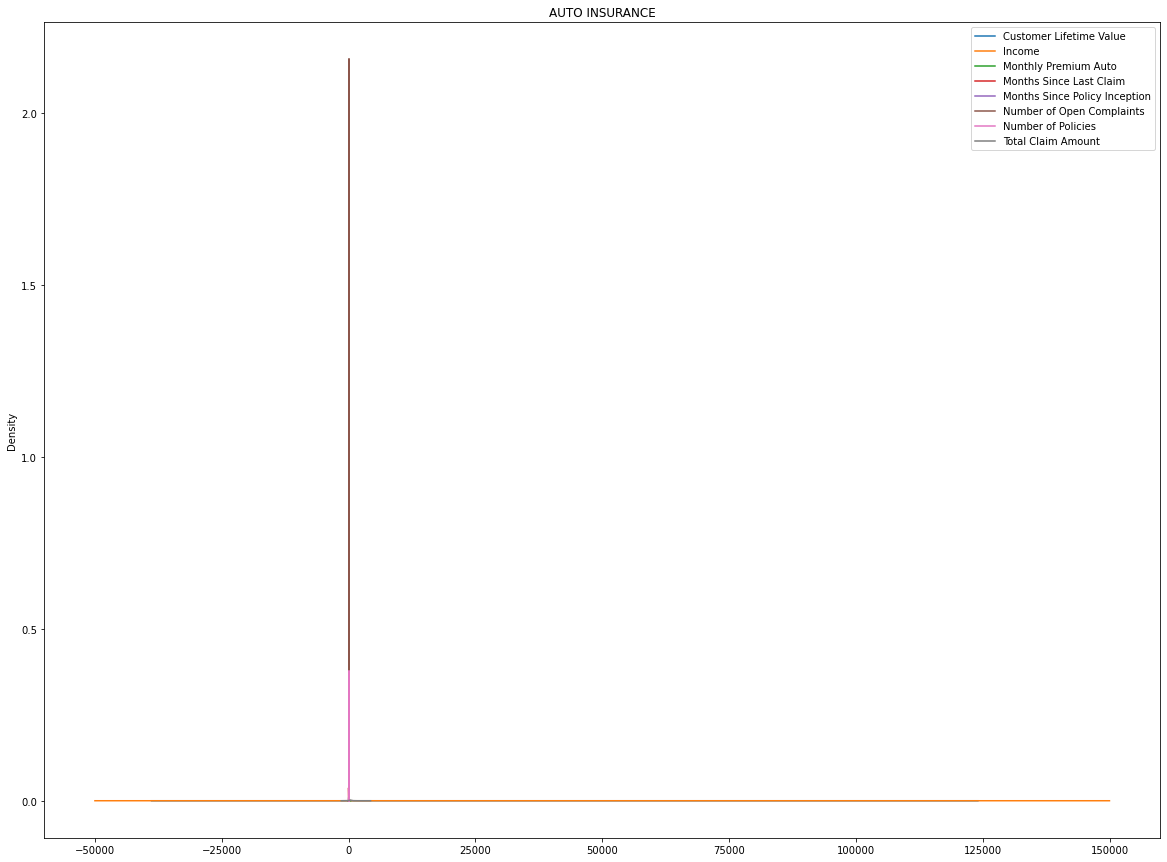

In [13]:
plt.rcParams['figure.figsize'] = (20,15)
data1.plot(kind='kde', title="AUTO INSURANCE")
plt.show()

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Lifetime Value'>

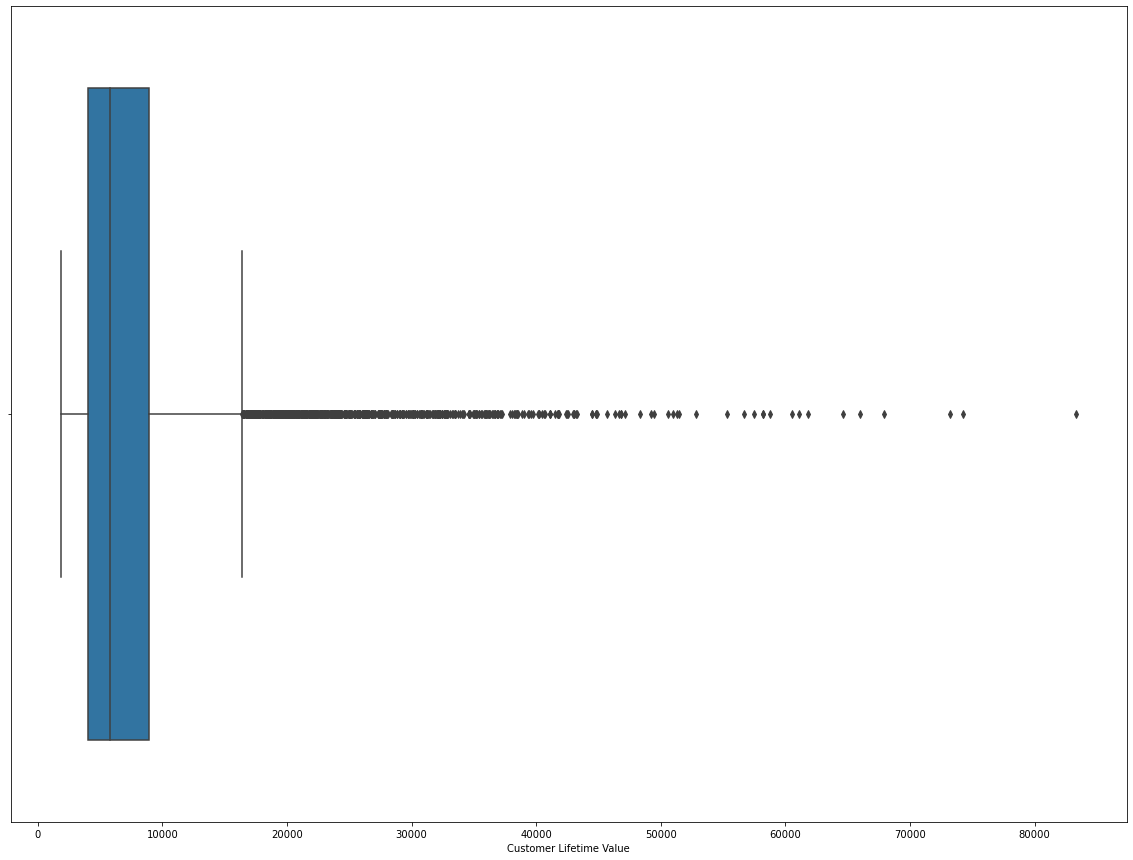

In [14]:
sns.boxplot(data1['Customer Lifetime Value'])

<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>

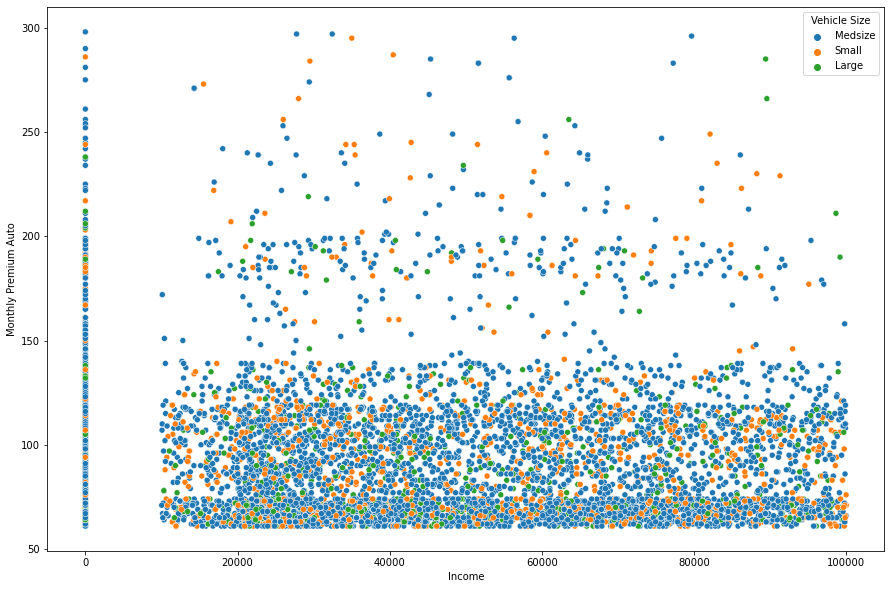

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Income', y = 'Monthly Premium Auto', data = data, hue='Vehicle Size')

<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>

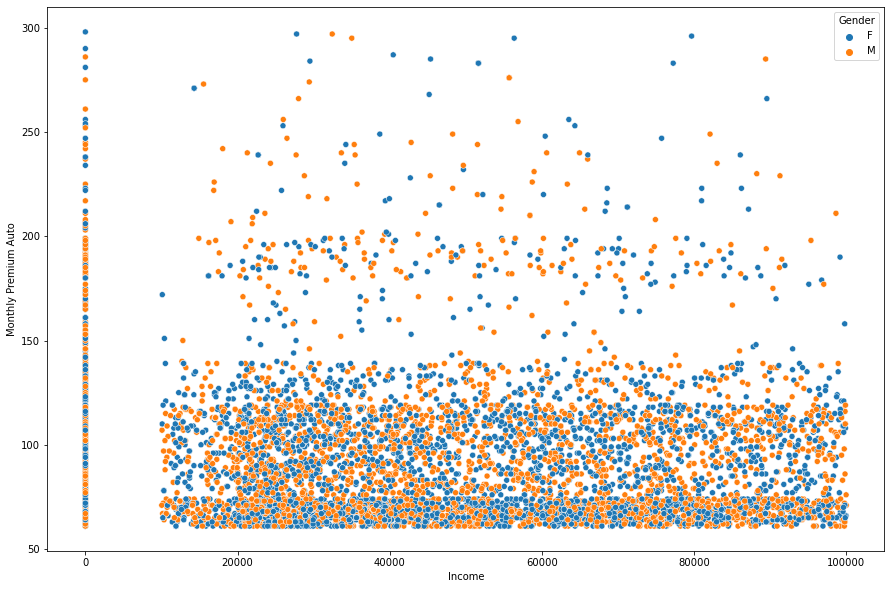

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Income', y = 'Monthly Premium Auto', data = data, hue='Gender')

<AxesSubplot:xlabel='Income', ylabel='Monthly Premium Auto'>

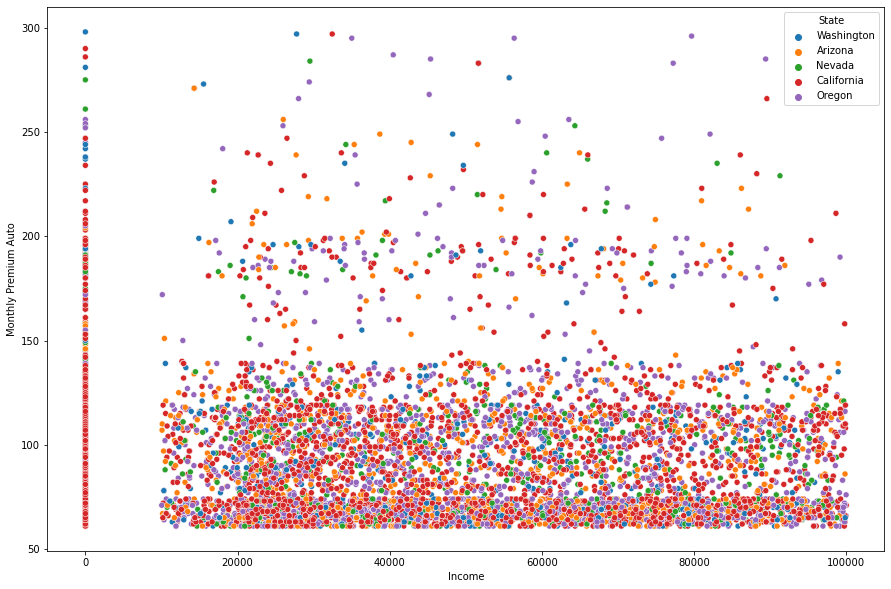

In [17]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Income', y = 'Monthly Premium Auto', data = data, hue='State')

<AxesSubplot:xlabel='Income', ylabel='Customer Lifetime Value'>

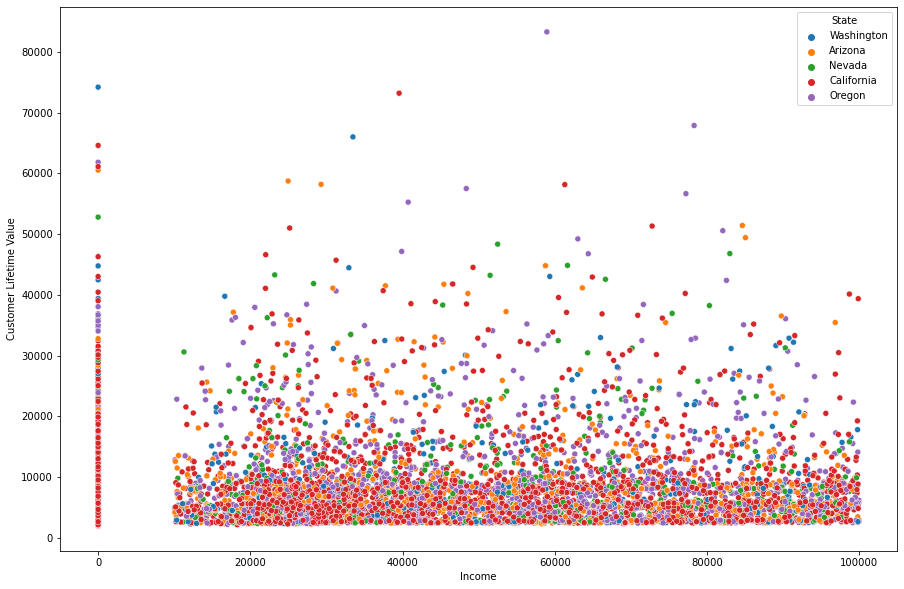

In [18]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Income', y = 'Customer Lifetime Value', data = data, hue='State')

<AxesSubplot:xlabel='Income', ylabel='Customer Lifetime Value'>

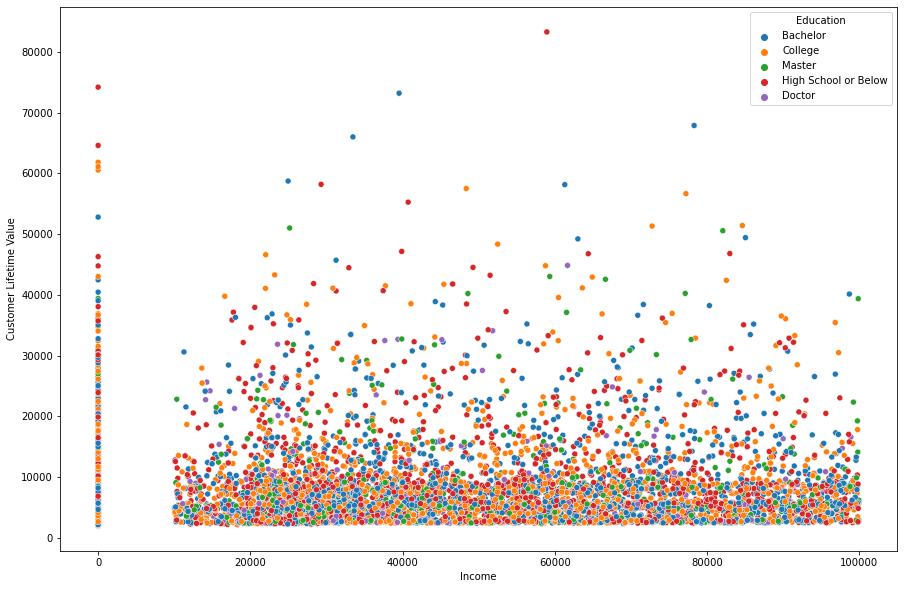

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Income', y = 'Customer Lifetime Value', data = data, hue='Education')

C:\Users\jaich\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

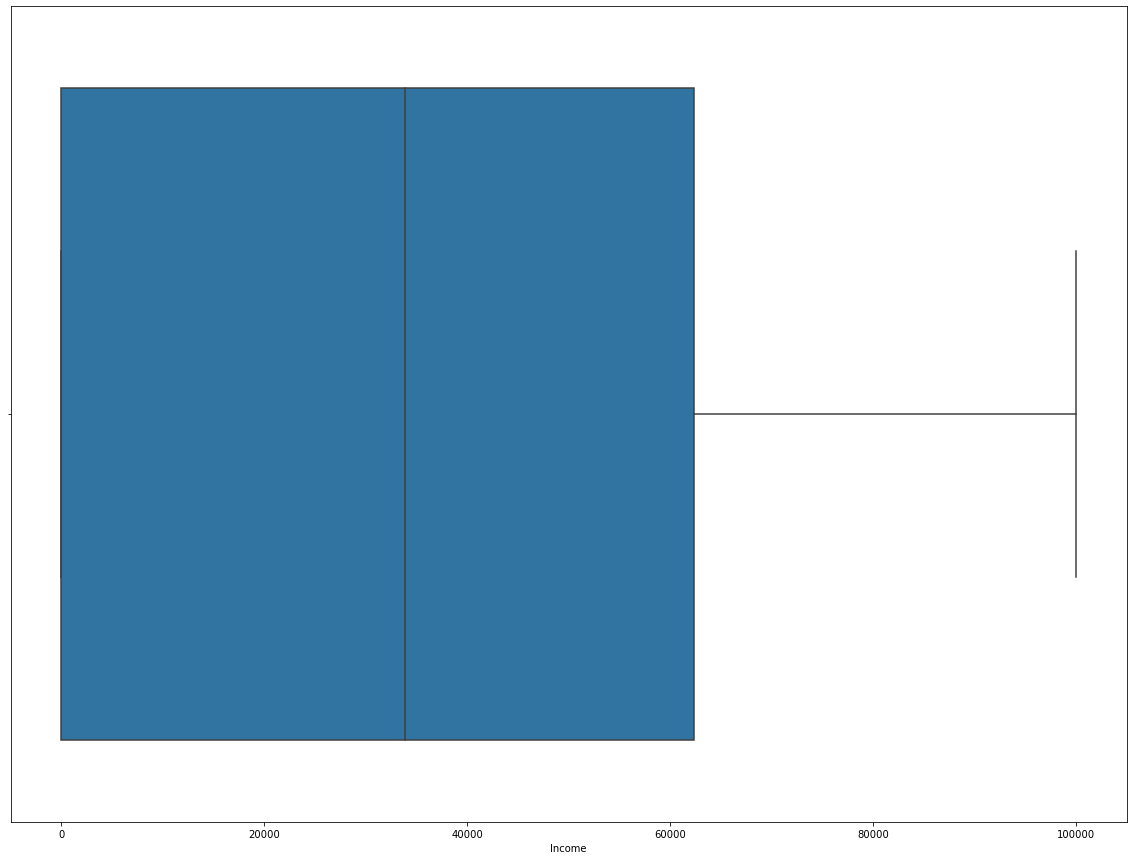

In [20]:
sns.boxplot(data1['Income'])

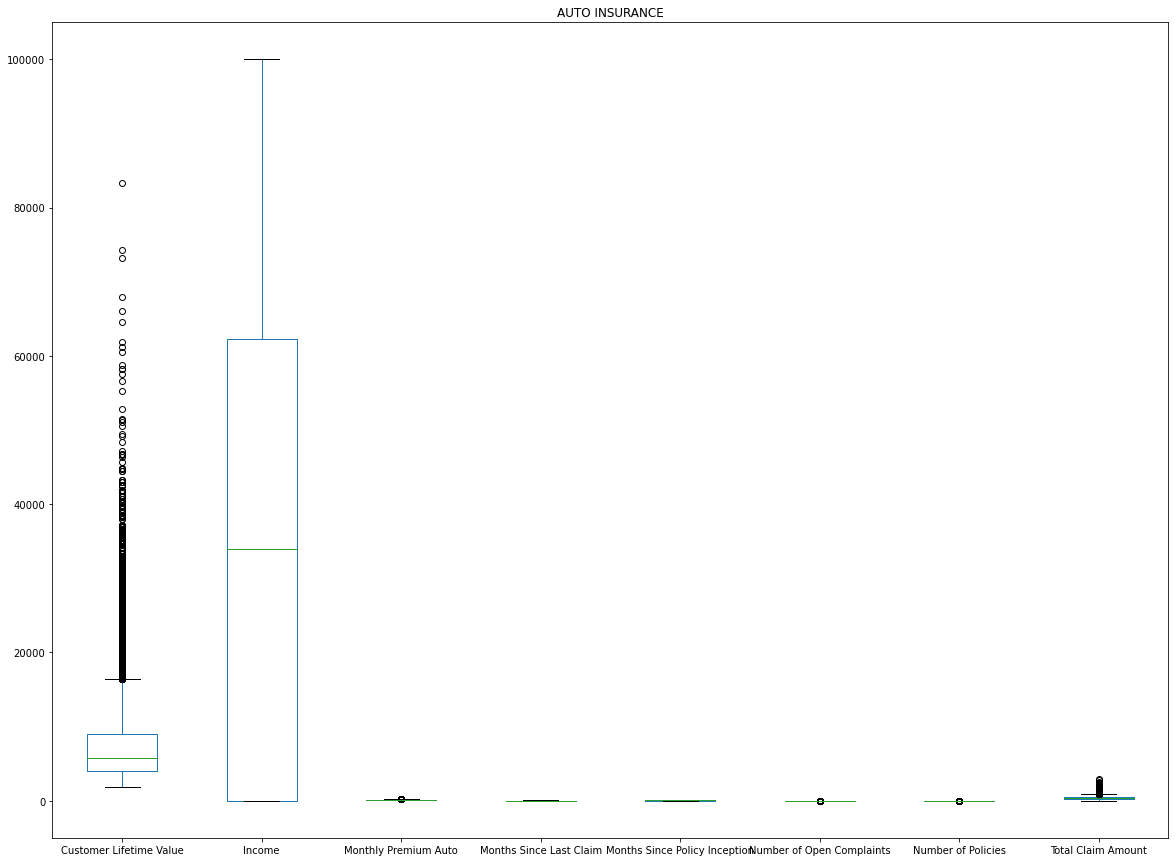

In [21]:
plt.rcParams['figure.figsize'] = (20,15)
data1.plot(kind='box', title="AUTO INSURANCE")
plt.show()

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Number of Policies'>

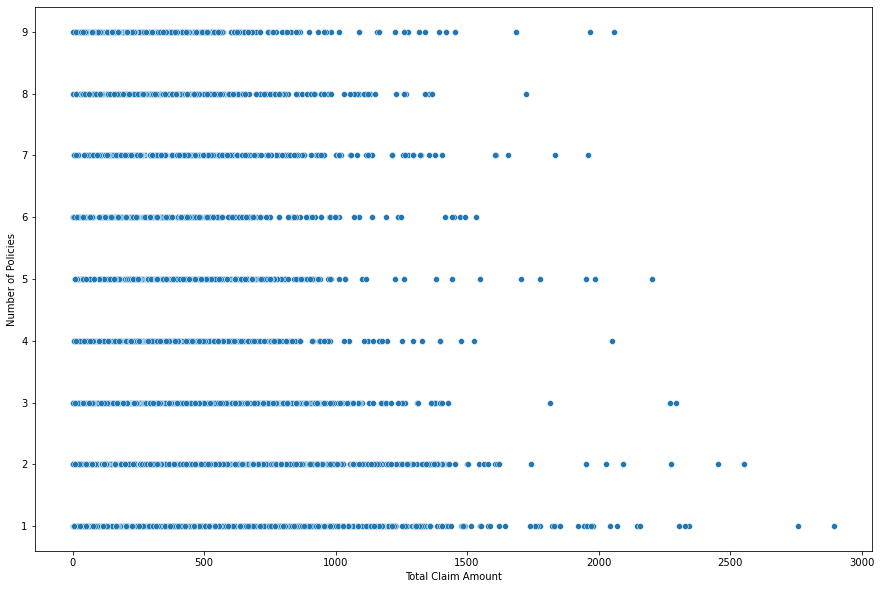

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Number of Policies', data = data)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

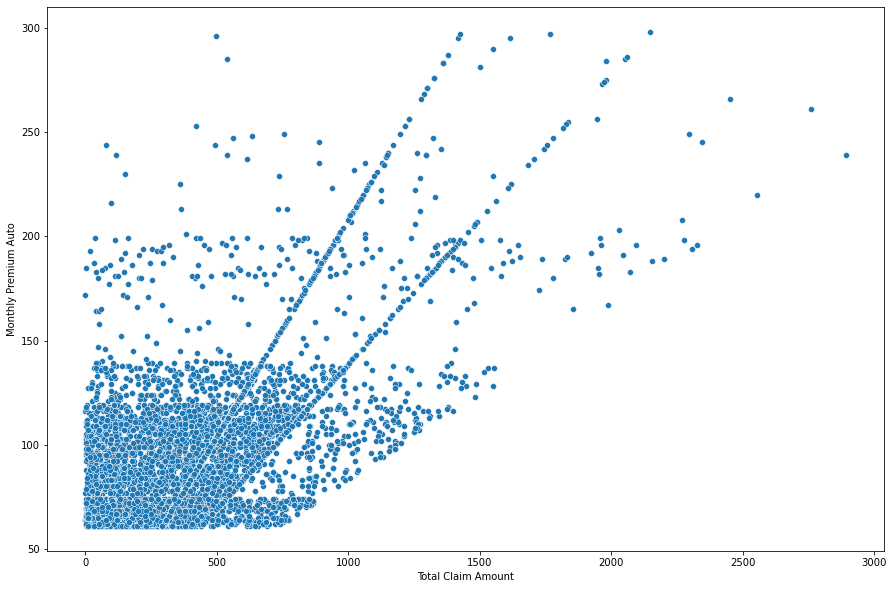

In [23]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

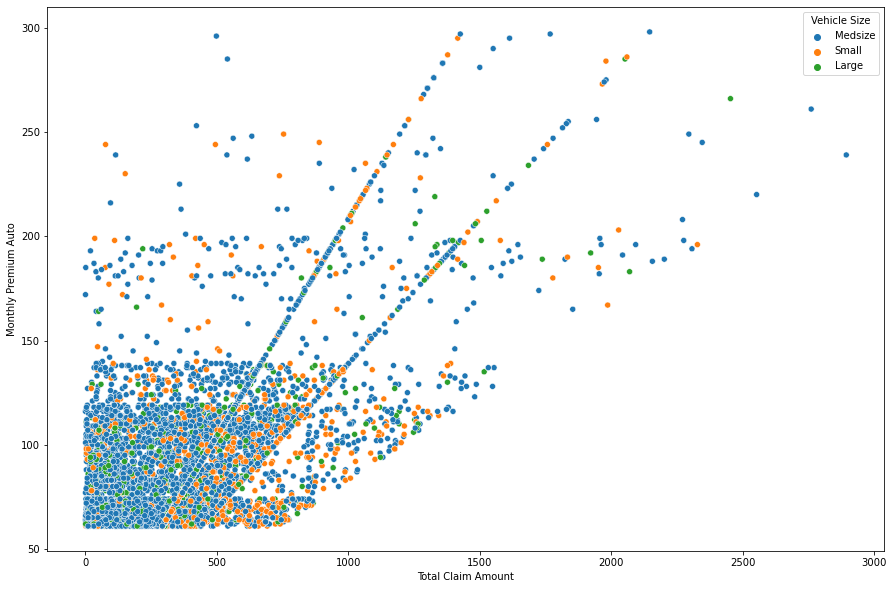

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data, hue = 'Vehicle Size' )

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

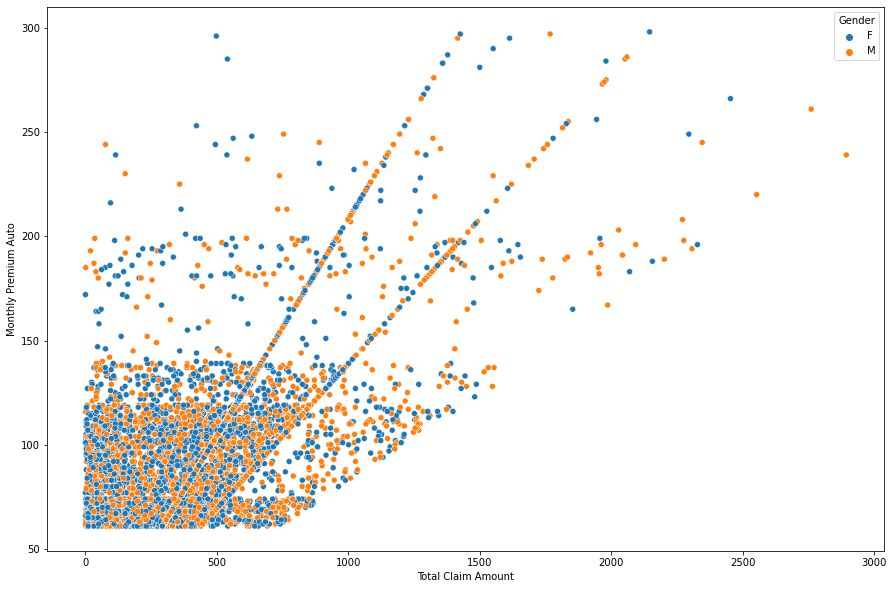

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data, hue = 'Gender' )

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

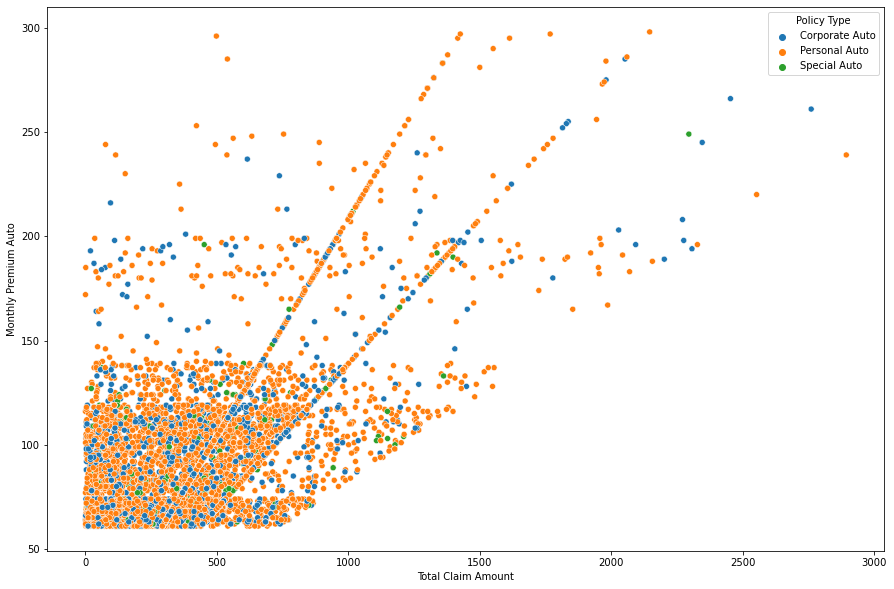

In [26]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data, hue = 'Policy Type')

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

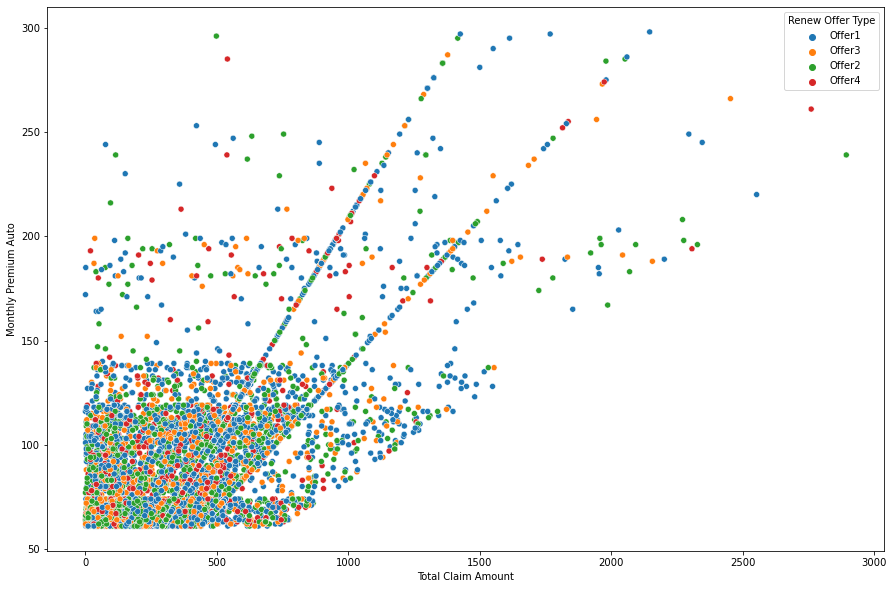

In [27]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data, hue = 'Renew Offer Type')

<AxesSubplot:xlabel='Total Claim Amount', ylabel='Monthly Premium Auto'>

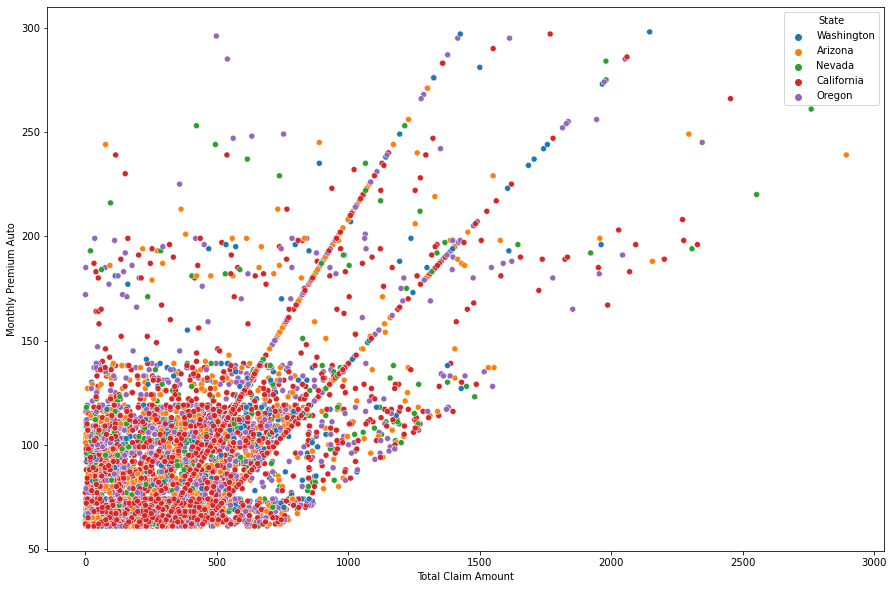

In [28]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = 'Total Claim Amount', y = 'Monthly Premium Auto', data = data, hue = 'State')

In [29]:
data['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [30]:
data['State'].value_counts() / data.shape[0]

California    0.344865
Oregon        0.284760
Arizona       0.186446
Nevada        0.096562
Washington    0.087366
Name: State, dtype: float64

34% of the data is from California state, then Oregon.

In [31]:
data['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [32]:
data['Vehicle Size'].value_counts() / data.shape[0]

Medsize    0.703306
Small      0.193125
Large      0.103569
Name: Vehicle Size, dtype: float64

70% of the data is for Medsize car, 19% for Small size and 10% Large Vehicle Type

In [33]:
data.value_counts('Gender') / data.shape[0]

Gender
F    0.509963
M    0.490037
dtype: float64

In [34]:
data.value_counts('EmploymentStatus') / data.shape[0]

EmploymentStatus
Employed         0.623823
Unemployed       0.253668
Medical Leave    0.047296
Disabled         0.044340
Retired          0.030874
dtype: float64

In [35]:
data.value_counts('Location Code') / data.shape[0]

Location Code
Suburban    0.632691
Rural       0.194110
Urban       0.173199
dtype: float64

In [36]:
data.value_counts('Marital Status') / data.shape[0]

Marital Status
Married     0.580031
Single      0.270090
Divorced    0.149880
dtype: float64

In [37]:
data.value_counts('Coverage') / data.shape[0]

Coverage
Basic       0.609591
Extended    0.300197
Premium     0.090212
dtype: float64

In [38]:
data.value_counts('Education') / data.shape[0]

Education
Bachelor                0.300854
College                 0.293519
High School or Below    0.287059
Master                  0.081125
Doctor                  0.037443
dtype: float64

In [39]:
data.value_counts('Vehicle Class') / data.shape[0]

Vehicle Class
Four-Door Car    0.505912
Two-Door Car     0.206481
SUV              0.196628
Sports Car       0.052989
Luxury SUV       0.020145
Luxury Car       0.017845
dtype: float64

In [40]:
data.value_counts('Sales Channel') / data.shape[0]

Sales Channel
Agent          0.380666
Branch         0.281038
Call Center    0.193234
Web            0.145062
dtype: float64

In [41]:
data.value_counts('Renew Offer Type') / data.shape[0]

Renew Offer Type
Offer1    0.410773
Offer2    0.320342
Offer3    0.156777
Offer4    0.112109
dtype: float64

In [42]:
data.value_counts('Response') / data.shape[0]

Response
No     0.856799
Yes    0.143201
dtype: float64

Lets create dummy variables for all our categorical data

In [43]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [44]:
data = data.drop(columns=['Customer'])
data

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [45]:
new_data = data.select_dtypes('object') # Lets create a dataframe to include only those dtypes which are objects

In [46]:
new_data

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [47]:
new_data.columns # We will use these columns to convert into Dummy Variables

Index(['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [48]:
new_df = pd.get_dummies(data, columns = ['State', 'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'])
new_df.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0


Lets check for Outliers

In [49]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)

IQR = Q3 - Q1

Outliers = (new_df < (Q1 - 1.5 * IQR)) | (new_df > (Q3 + 1.5 * IQR))
Outliers.sum()

Customer Lifetime Value           817
Income                              0
Monthly Premium Auto              430
Months Since Last Claim             0
Months Since Policy Inception       0
                                 ... 
Vehicle Class_Sports Car          484
Vehicle Class_Two-Door Car       1886
Vehicle Size_Large                946
Vehicle Size_Medsize                0
Vehicle Size_Small               1764
Length: 124, dtype: int64

In [50]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

norm = new_df.copy()

df_norm = norm_func(norm)
df_norm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Lets Start Clustering


In [51]:
from sklearn.cluster import AgglomerativeClustering

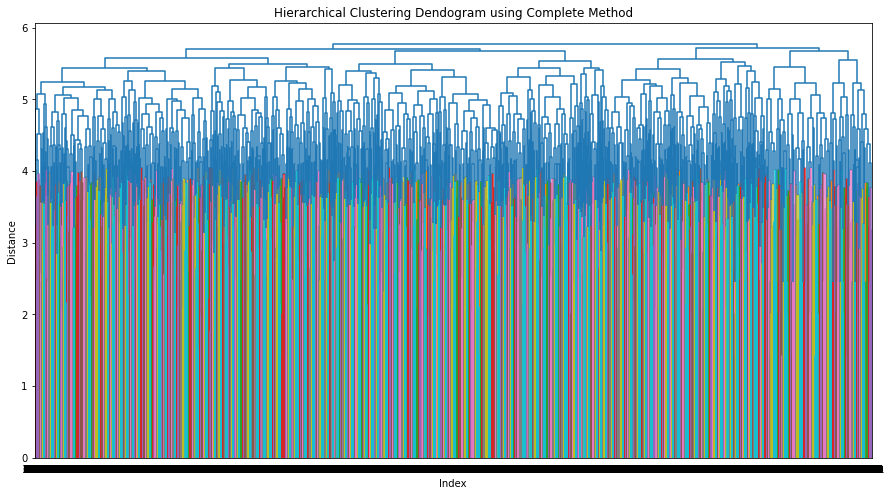

In [74]:
z = linkage(df_norm, method = 'complete', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

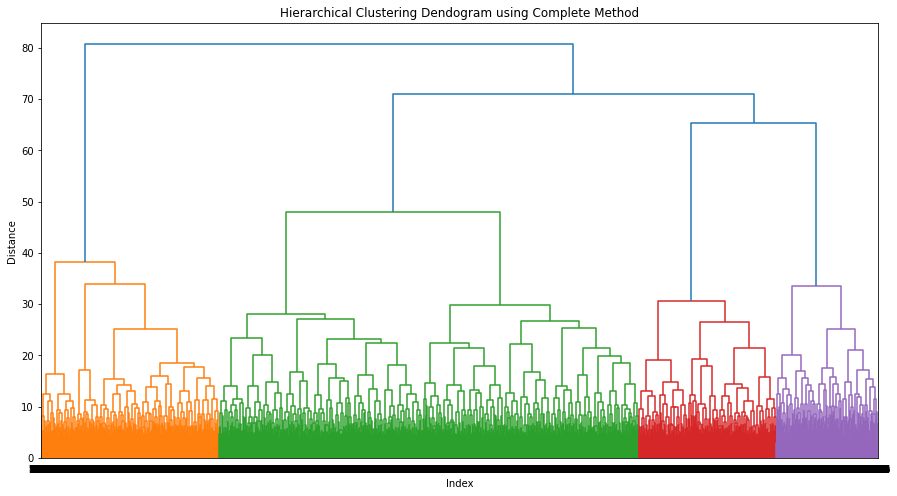

In [75]:
z_ward = linkage(df_norm, method = 'ward', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Complete Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_ward, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

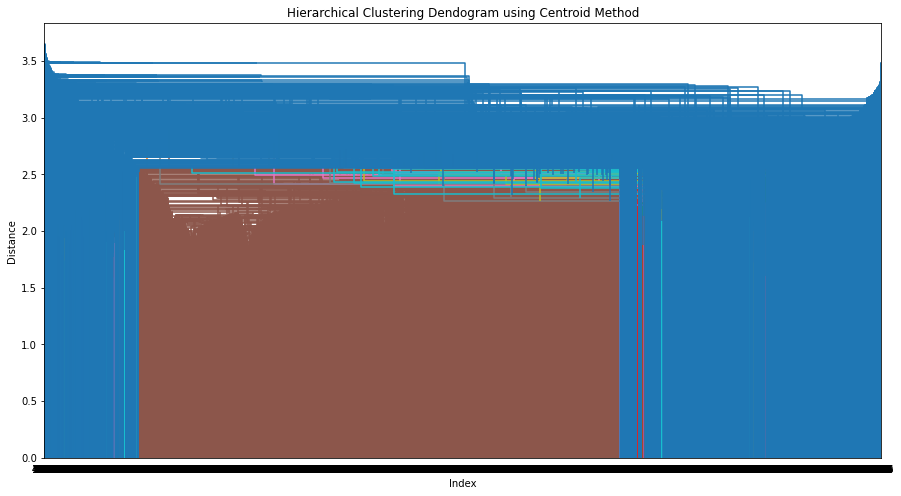

In [76]:
z_centre = linkage(df_norm, method = 'centroid', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Centroid Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_centre, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

In [ ]:
z_single = linkage(df_norm, method = 'single', metric = 'euclidean')
plt.figure(figsize= (15,8));plt.title("Hierarchical Clustering Dendogram using Single Method");plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z_single, leaf_rotation=0,
              leaf_font_size=10)
plt.show()

FROM Above visuals we can use WARD with 3,4, or 5 clusters with EUCLIDEAN distance

In [53]:
h_ward1 = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean').fit(df_norm)
h_ward1.labels_

array([1, 0, 2, ..., 1, 2, 1], dtype=int64)

In [55]:
cluster_labels = pd.Series(h_ward1.labels_)
cluster_data = new_df.copy()
cluster_data['clust'] = cluster_labels
cluster_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,clust
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,1,0,1,0,1
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,0,1,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,1,0,1,0,2
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,1,0,0,0,1,0,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,1,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,1,...,1,0,0,0,0,0,0,1,0,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,1,...,1,0,0,0,0,0,0,1,0,0
9131,8163.890428,0,85,9,37,3,2,790.784983,0,1,...,1,0,0,0,0,0,0,1,0,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,1,...,1,0,0,0,0,0,1,0,0,2


In [56]:
cluster_data.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'State_Arizona', 'State_California',
       ...
       'Vehicle Class_Four-Door Car', 'Vehicle Class_Luxury Car',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
       'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car',
       'Vehicle Size_Large', 'Vehicle Size_Medsize', 'Vehicle Size_Small',
       'clust'],
      dtype='object', length=125)

In [57]:
cluster_data1 = cluster_data.iloc[:,:-1].groupby(cluster_data['clust']).mean()
cluster_data1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
clust,,,,,,,,,,,,,,,,,,,,,
0,7584.823568,19010.412553,93.842710,14.91083,48.527746,0.367011,2.967088,539.654510,0.184080,0.333333,...,0.137390,0.492920,0.014925,0.024110,0.192882,0.064677,0.210486,0.125526,0.675852,0.198622
1,8045.351458,37788.267591,93.697483,15.44376,47.619928,0.368772,2.972265,435.495211,0.173087,0.370313,...,0.147406,0.510529,0.023112,0.017463,0.194145,0.057524,0.197227,0.098100,0.713405,0.188495
2,8227.740058,48254.163533,92.659598,15.05575,47.989287,0.400962,2.963052,373.183349,0.193485,0.340621,...,0.148448,0.511369,0.017272,0.019021,0.199825,0.044381,0.208133,0.093354,0.714692,0.191955


In [58]:
cluster_data1.to_csv("AUTO_Insurance_WARD_EUCLIDEAN.csv", encoding='utf8')

Lets use 4 clusters

In [59]:
h_ward2 = AgglomerativeClustering(n_clusters=4, linkage='ward', affinity='euclidean').fit(df_norm)
h_ward2.labels_

array([1, 3, 0, ..., 1, 0, 1], dtype=int64)

In [60]:
cluster_labels = pd.Series(h_ward2.labels_)
cluster_data1 = new_df.copy()
cluster_data1['clust'] = cluster_labels
cluster_data1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,clust
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,1,0,1,0,1
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,0,1,0,3
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,1,0,1,0,0
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,1,0,0,0,1,0,1
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,1,...,1,0,0,0,0,0,0,1,0,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,1,...,1,0,0,0,0,0,0,1,0,2
9131,8163.890428,0,85,9,37,3,2,790.784983,0,1,...,1,0,0,0,0,0,0,1,0,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,1,...,1,0,0,0,0,0,1,0,0,0


In [61]:
cluster_data2 = cluster_data1.iloc[:,:-1].groupby(cluster_data1['clust']).mean()
cluster_data2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
clust,,,,,,,,,,,,,,,,,,,,,
0,8227.740058,48254.163533,92.659598,15.055750,47.989287,0.400962,2.963052,373.183349,0.193485,0.340621,...,0.148448,0.511369,0.017272,0.019021,0.199825,0.044381,0.208133,0.093354,0.714692,0.191955
1,8045.351458,37788.267591,93.697483,15.443760,47.619928,0.368772,2.972265,435.495211,0.173087,0.370313,...,0.147406,0.510529,0.023112,0.017463,0.194145,0.057524,0.197227,0.098100,0.713405,0.188495
2,7658.194178,38979.596934,94.627592,14.402164,47.866546,0.345356,2.826871,449.882716,0.176736,0.358882,...,0.136159,0.460775,0.010821,0.027051,0.209197,0.075744,0.216411,0.126240,0.733093,0.140667
3,7530.722500,4285.794548,93.263963,15.285904,49.015293,0.382979,3.070479,605.849270,0.189495,0.314495,...,0.138298,0.516622,0.017952,0.021941,0.180851,0.056516,0.206117,0.125000,0.633644,0.241356


In [62]:
cluster_data2.to_csv("AUTO_Insurance_WARD_EUCLIDEAN_4Clusters.csv", encoding='utf8')

Lets use 5 clusters

In [63]:
h_ward3 = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean').fit(df_norm)
h_ward3.labels_

array([0, 1, 4, ..., 0, 3, 0], dtype=int64)

In [64]:
cluster_labels = pd.Series(h_ward3.labels_)
cluster_data2 = new_df.copy()
cluster_data2['clust'] = cluster_labels
cluster_data2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small,clust
0,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,1,0,1,0,0
1,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,1,0,0,0,0,0,0,1,0,1
2,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,1,0,1,0,4
3,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,1,0,0,0,1,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,1,0,0,0,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,0,1,...,1,0,0,0,0,0,0,1,0,0
9130,3096.511217,21604,79,14,28,0,1,379.200000,0,1,...,1,0,0,0,0,0,0,1,0,2
9131,8163.890428,0,85,9,37,3,2,790.784983,0,1,...,1,0,0,0,0,0,0,1,0,0
9132,7524.442436,21941,96,34,3,0,3,691.200000,0,1,...,1,0,0,0,0,0,1,0,0,3


In [65]:
cluster_data3 = cluster_data2.iloc[:,:-1].groupby(cluster_data2['clust']).mean()
cluster_data3

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
clust,,,,,,,,,,,,,,,,,,,,,
0,8045.351458,37788.267591,93.697483,15.443760,47.619928,0.368772,2.972265,435.495211,0.173087,0.370313,...,0.147406,0.510529,0.023112,0.017463,0.194145,0.057524,0.197227,0.098100,0.713405,0.188495
1,7530.722500,4285.794548,93.263963,15.285904,49.015293,0.382979,3.070479,605.849270,0.189495,0.314495,...,0.138298,0.516622,0.017952,0.021941,0.180851,0.056516,0.206117,0.125000,0.633644,0.241356
2,7658.194178,38979.596934,94.627592,14.402164,47.866546,0.345356,2.826871,449.882716,0.176736,0.358882,...,0.136159,0.460775,0.010821,0.027051,0.209197,0.075744,0.216411,0.126240,0.733093,0.140667
3,8201.837384,45545.732514,93.669351,15.170835,48.498516,0.407800,2.911403,412.642733,0.196270,0.359898,...,0.125053,0.512929,0.015685,0.018652,0.214498,0.044510,0.193726,0.085206,0.682493,0.232302
4,8255.326698,51138.673138,91.584199,14.933183,47.446953,0.393679,3.018059,331.158659,0.190519,0.320090,...,0.173363,0.509707,0.018962,0.019413,0.184199,0.044244,0.223476,0.102032,0.748984,0.148984


In [66]:
cluster_data3.to_csv("AUTO_Insurance_WARD_EUCLIDEAN_5Clusters.csv", encoding='utf8')

#### ----- WE have clustered our data ------ ####